In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('Company Stock and Investment.csv')
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [3]:
df_oil = df.drop(['Gold Investments','Comp Stock','Other sharesInvestments'],axis=1)
df_oil

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
...,...,...
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376


In [4]:
df_oil.isnull().sum()

Date               0
Oil Investments    0
dtype: int64

In [5]:
df_oil['Date']=pd.to_datetime(df_oil['Date'],format='%d-%m-%Y')

In [6]:
df_oil.set_index('Date',inplace=True)

In [7]:
df_oil

,Oil Investments
Date,
2009-12-31,0.025417
2010-01-04,0.026830
2010-01-05,0.002699
2010-01-06,0.021688
2010-01-07,-0.006256
...,...
2017-11-09,0.005984
2017-11-10,-0.007173
2017-11-13,0.000352


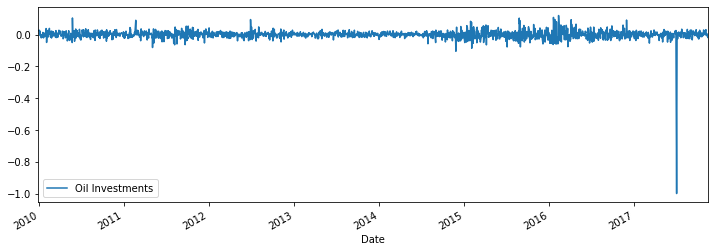

In [8]:
df_oil.plot(figsize=(12,4))

In [9]:
from statsmodels.tsa.stattools import adfuller
def adf_test(price):
    result=adfuller(price) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [10]:
adf_test(df_oil['Oil Investments'])

ADF Test Statistic : -45.942162929839924
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


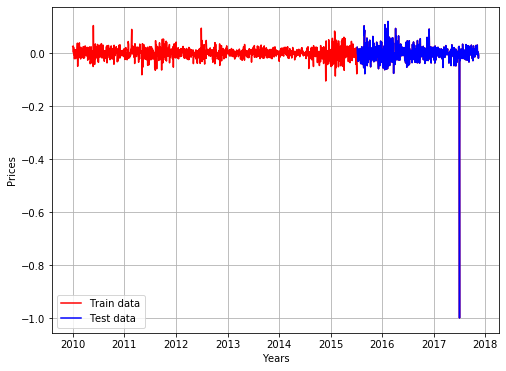

In [11]:
size=int(len(df)*0.70)
train_data, test_data = df_oil[0:size], df_oil[size:]
plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Prices')
plt.plot(df_oil,'red',label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data,order=(5,1,1))
results=model.fit()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1387
Model:                 ARIMA(5, 1, 1)   Log Likelihood                3539.106
Method:                       css-mle   S.D. of innovations              0.019
Date:                Sun, 01 Nov 2020   AIC                          -7062.212
Time:                        17:31:49   BIC                          -7020.333
Sample:                             1   HQIC                         -7046.550
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.937e-06   1.49e-06     -1.299      0.194   -4.86e-06    9.87e-07
ar.L1.D.Oil Investments    -0.0202      0.027     -0.750      0.454      -0.073       0.033
ar.L2.D.Oil Investments     0.0054      0.027      0.200      0.842      -0.048       0.058
ar.L3.D.Oil Investments    -0.0545      0.027     -2.009      0.045      -0.108      -0.001
ar.L4.D.Oil Investments     0.0068      0.027      0.250      0.802      -0.046       0.060
ar.L5.D.Oil Investments     0.0124      0.027      0.457      0.648      -0.041       0.066
ma.L1.D.Oil Investments    -0.9983      0.004   -272.508      0.000      -1.005      -0.991
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.6801           -0.0000j            2.6801           -0.0000
AR.2            0.7343           -2.0093j            2.1393           -0.1942
AR.3            0.7343           +2.0093j            2.1393            0.1942
AR.4           -2.3485           -1.0300j            2.5644           -0.4342
AR.5           -2.3485           +1.0300j            2.5644            0.4342
MA.1            1.0017           +0.0000j            1.0017            0.0000
-----------------------------------------------------------------------------
"""

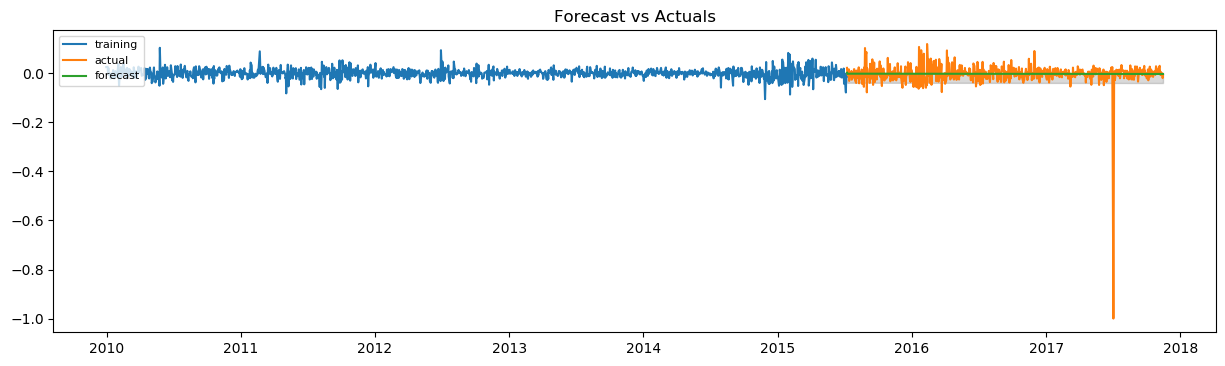

In [14]:
fc, se, conf = results.forecast(596, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(15,4), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [15]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE: 0.0023420536467458194
MAE: 0.020676335962481585
RMSE: 0.0483947687952512


In [16]:
fc_series

Date
2015-07-09    0.002410
2015-07-10   -0.002086
2015-07-13   -0.001771
2015-07-14   -0.001825
2015-07-15   -0.001605
                ...   
2017-11-09   -0.002653
2017-11-10   -0.002655
2017-11-13   -0.002657
2017-11-14   -0.002659
2017-11-15   -0.002661
Length: 596, dtype: float64

In [17]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_oil.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [18]:
df_oil_future=pd.DataFrame(index=future_dates[1:],columns=df_oil.columns)

In [19]:
df_oil_future.tail()

,Oil Investments
2022-06-15,NaN
2022-07-15,NaN
2022-08-15,NaN
2022-09-15,NaN
2022-10-15,NaN


In [20]:
fc1, se1, conf1 = results.forecast(59, alpha=0.05)  # 95% confidence
fc1_series = pd.Series(fc1, index=df_oil_future.index)
fc1_series

2017-12-15    0.002410
2018-01-15   -0.002086
2018-02-15   -0.001771
2018-03-15   -0.001825
2018-04-15   -0.001605
2018-05-15   -0.001459
2018-06-15   -0.001513
2018-07-15   -0.001522
2018-08-15   -0.001531
2018-09-15   -0.001526
2018-10-15   -0.001527
2018-11-15   -0.001529
2018-12-15   -0.001531
2019-01-15   -0.001533
2019-02-15   -0.001535
2019-03-15   -0.001537
2019-04-15   -0.001539
2019-05-15   -0.001541
2019-06-15   -0.001543
2019-07-15   -0.001545
2019-08-15   -0.001547
2019-09-15   -0.001549
2019-10-15   -0.001551
2019-11-15   -0.001553
2019-12-15   -0.001555
2020-01-15   -0.001557
2020-02-15   -0.001558
2020-03-15   -0.001560
2020-04-15   -0.001562
2020-05-15   -0.001564
2020-06-15   -0.001566
2020-07-15   -0.001568
2020-08-15   -0.001570
2020-09-15   -0.001572
2020-10-15   -0.001574
2020-11-15   -0.001576
2020-12-15   -0.001578
2021-01-15   -0.001580
2021-02-15   -0.001582
2021-03-15   -0.001584
2021-04-15   -0.001586
2021-05-15   -0.001588
2021-06-15   -0.001589
2021-07-15 

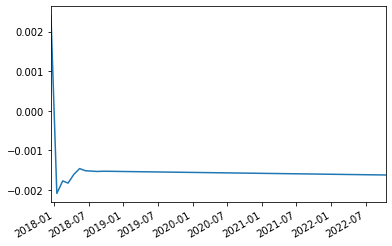

In [21]:
fc1_series.plot()

In [22]:
df_oil_fc=pd.concat([df_oil,df_oil_future])
df_oil_fc.reset_index(inplace=True)
df_oil_fc.tail()


,index,Oil Investments
2038,2022-06-15,NaN
2039,2022-07-15,NaN
2040,2022-08-15,NaN
2041,2022-09-15,NaN
2042,2022-10-15,NaN


In [23]:
df_oil_fc['forecast']=results.predict(start=97,end=144,dynamic=True)
df_oil_fc

,index,Oil Investments,forecast
0,2009-12-31,0.025417,NaN
1,2010-01-04,0.026830,NaN
2,2010-01-05,0.002699,NaN
3,2010-01-06,0.021688,NaN
4,2010-01-07,-0.006256,NaN
...,...,...,...
2038,2022-06-15,NaN,NaN
2039,2022-07-15,NaN,NaN
2040,2022-08-15,NaN,NaN
2041,2022-09-15,NaN,NaN
